# Crime Statistic Visualization
Created as homework for Bill Howe's Visualization course on coursera.

In [18]:
import pandas as pd
sf_crime = pd.read_csv("sanfrancisco_incidents_summer_2014.csv")
#se_crime = pd.read_csv("seattle_incidents_summer_2014.csv")

import numpy as np
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

%matplotlib inline
sf_crime.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000


The important columns are the nominals: Category and PdDistrict, ordinals: DayOfWeek and Date, and the scalars: Time, X, and Y 

# Categories of Crime Reported
The San Francisco dataset is organized by Category with a description that further identifies the type of crime. The chart below shows the top 15 crime categories.

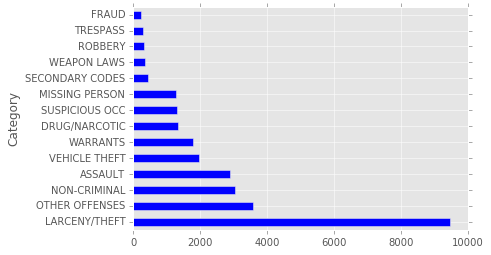

In [10]:
sf_crimes_group = sf_crime.groupby("Category")
sf_crimes_size = sf_crimes_group.size()

sf_crimes_size.sort_values(inplace=True,ascending=False)
sf_crimes_size[:14].plot(kind='barh')

# What time of day are Crimes most likely to occur?
From the chart above, I chose 5 crimes to examine over the hours of the day.

As expected, the THEFT/LARCENY category is most frequent. All crimes are down during the early hours of the morning and peak late at night.

Robberies occur mostly during evening hours while vehicle thefts, assaults, and drug violations can occur throughout the day.

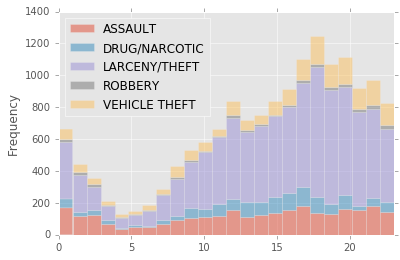

In [49]:
hours = pd.to_numeric(sf_crime["Time"].str.split(":").str[0])
hours.dtype
sf_crime['hour']=hours
d = {}
categories = ["LARCENY/THEFT", "ASSAULT", "VEHICLE THEFT", "DRUG/NARCOTIC","ROBBERY"]
for c in categories:
    d[c] = sf_crime[sf_crime.Category==c]["hour"]
df = pd.DataFrame(d)
df.plot(kind="hist", alpha=0.5,stacked=True,bins=24,xlim=(0,23))


# What about neighborhood?
The chart below shows crime statistics by precinct. The top four districts are in the northwest part of San Fransisco which corresponds to the downtown area. The bottom three districts are all on the easter side and furtherest away from the downtown area.

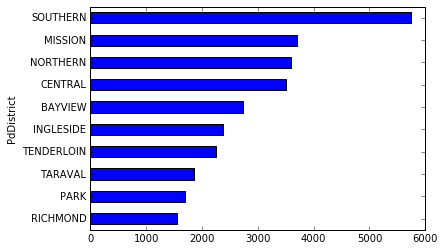

In [99]:
byDist = sf_crime.groupby("PdDistrict").size()
byDist.sort_values(inplace=True)
byDist.plot(kind="barh")

## Binning geographically
The plot below shows that the crime stats are 

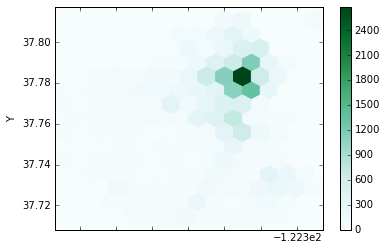

In [127]:
sf_crime.plot(kind='hexbin', x='X',y='Y',gridsize=15)